In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1997.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1997,18050,168,39,3563
1,1997,17204,385,15,3535
2,1997,17496,50,29,3507
3,1997,17920,218,26,3555
4,1997,17448,159,15,3539
...,...,...,...,...,...
1757,1997,17116,235,35,3519
1758,1997,17494,32,28,3528
1759,1997,18024,161,31,3546
1760,1997,17898,245,32,3546


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1762, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1762 non-null   int64
 1   Maximum length (m))  1762 non-null   int64
 2   Recession(m),        1762 non-null   int64
 3   Rate/yr(m)           1762 non-null   int64
 4   Snout altitude (m)   1762 non-null   int64
dtypes: int64(5)
memory usage: 69.0 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1762


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1997,18050,168,39,3563
1,1997,17204,385,15,3535
2,1997,17496,50,29,3507
3,1997,17920,218,26,3555
4,1997,17448,159,15,3539


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0090,0.0125,-0.0070
"Recession(m),",NaN,0.0090,1.0000,0.0092,0.0375
Rate/yr(m),NaN,0.0125,0.0092,1.0000,0.0078
Snout altitude (m),NaN,-0.0070,0.0375,0.0078,1.0000


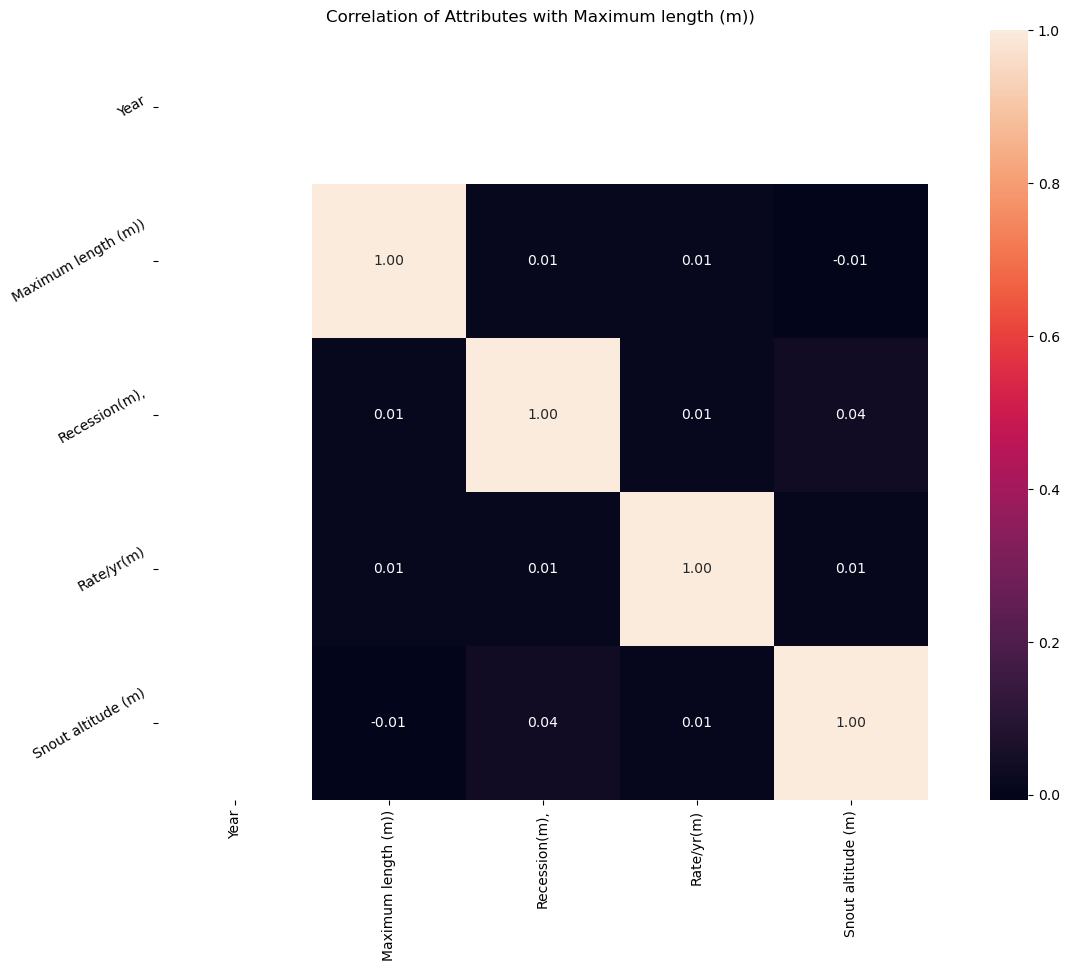

In [11]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [12]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [13]:
df.describe()


,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,762.0000","1,762.0000","1,762.0000","1,762.0000","1,762.0000"
mean,"1,997.0000","17,548.5970",218.6930,27.8070,"3,532.7571"
std,0.0000,299.5423,129.7937,8.6155,20.4510
min,"1,997.0000","17,037.0000",0.0000,13.0000,"3,496.0000"
25%,"1,997.0000","17,288.2500",107.2500,20.0000,"3,515.0000"
50%,"1,997.0000","17,545.0000",214.0000,28.0000,"3,533.0000"
75%,"1,997.0000","17,811.0000",332.0000,35.0000,"3,551.0000"
max,"1,997.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [14]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1997   1.0000
Name: count, dtype: float64

Recession(m),
81    0.0062
109   0.0062
407   0.0057
102   0.0051
328   0.0051
       ...  
240   0.0006
190   0.0006
405   0.0006
371   0.0006
246   0.0006
Name: count, Length: 436, dtype: float64

Rate/yr(m)
37   0.0403
39   0.0397
26   0.0392
38   0.0375
32   0.0363
34   0.0358
35   0.0352
20   0.0352
21   0.0346
24   0.0346
29   0.0346
40   0.0341
25   0.0341
14   0.0341
17   0.0335
30   0.0329
31   0.0329
13   0.0329
23   0.0323
36   0.0323
19   0.0318
33   0.0318
41   0.0312
16   0.0312
42   0.0306
22   0.0306
27   0.0284
28   0.0284
18   0.0278
15   0.0261
Name: count, dtype: float64

Snout altitude (m)
3556   0.0199
3528   0.0182
3506   0.0182
3545   0.0176
3567   0.0176
        ...  
3502   0.0096
3497   0.0091
3508   0.0074
3524   0.0074
3496   0.0017
Name: count, Length: 72, dtype: float64



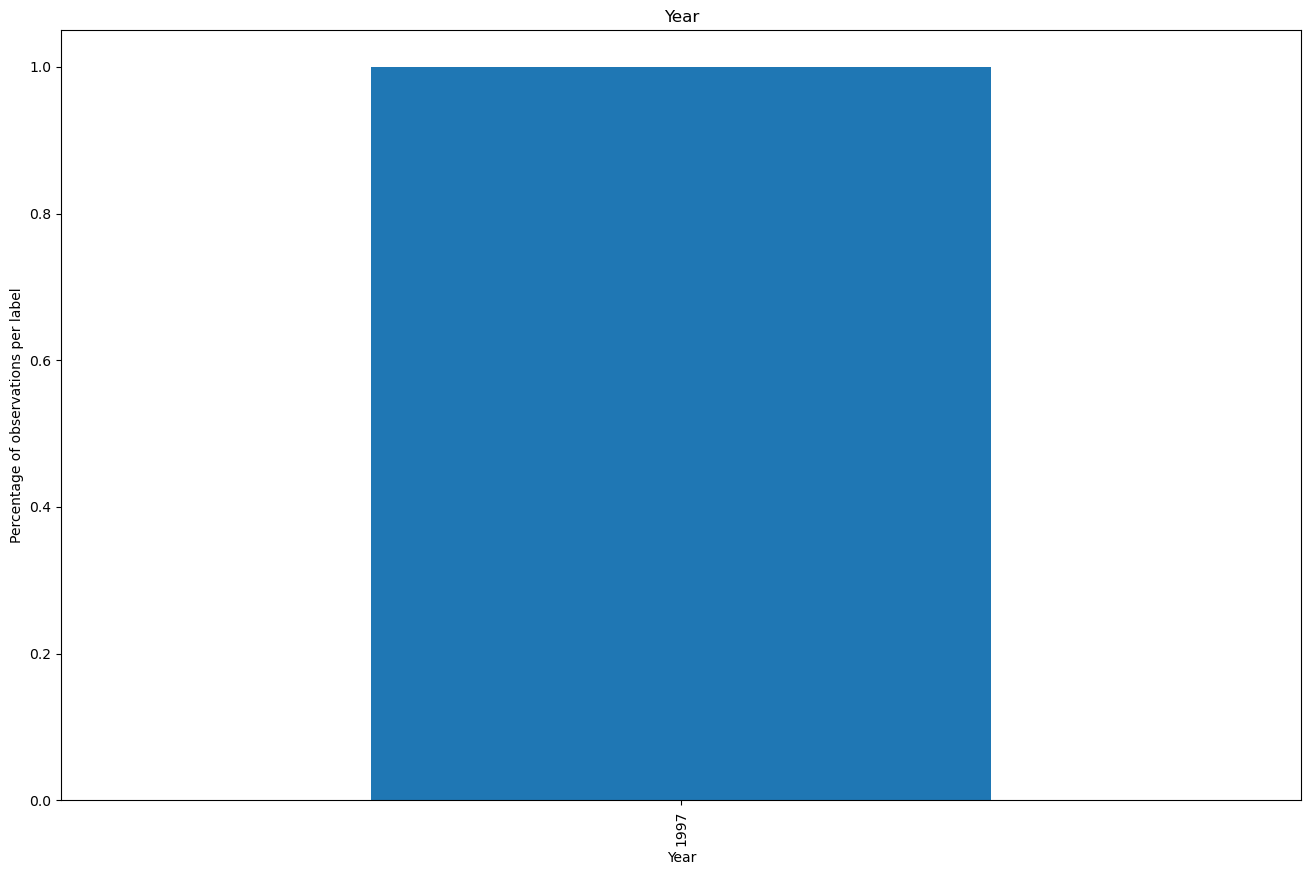

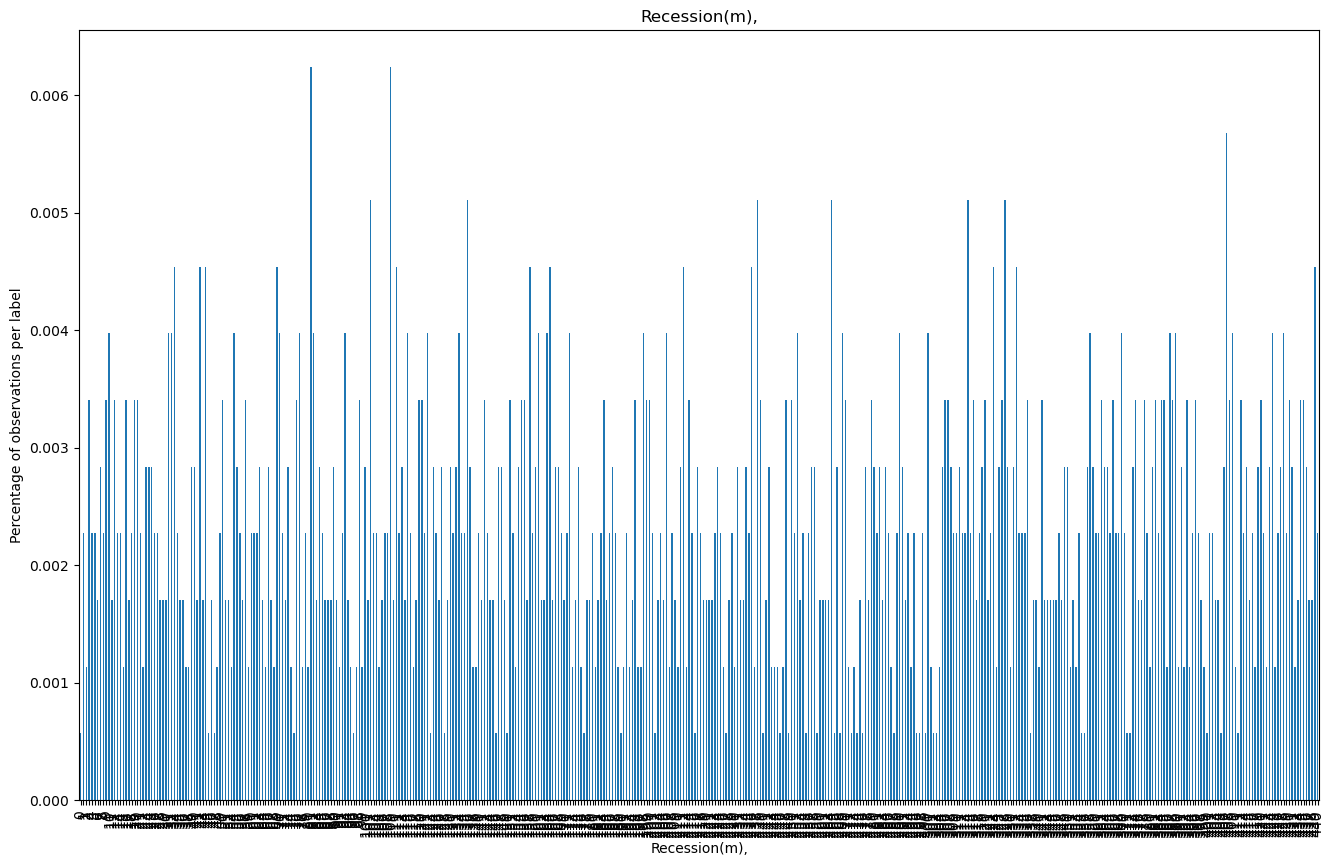

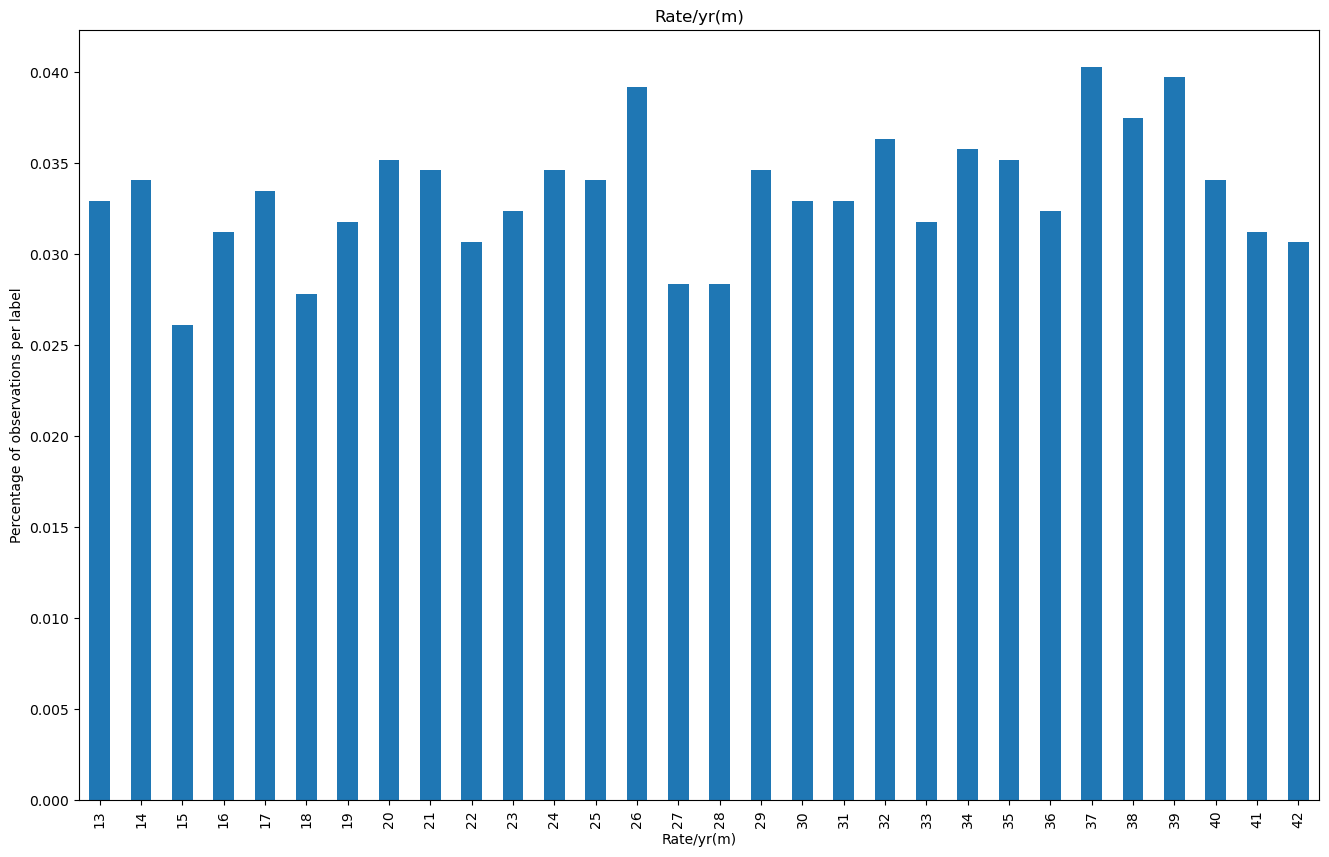

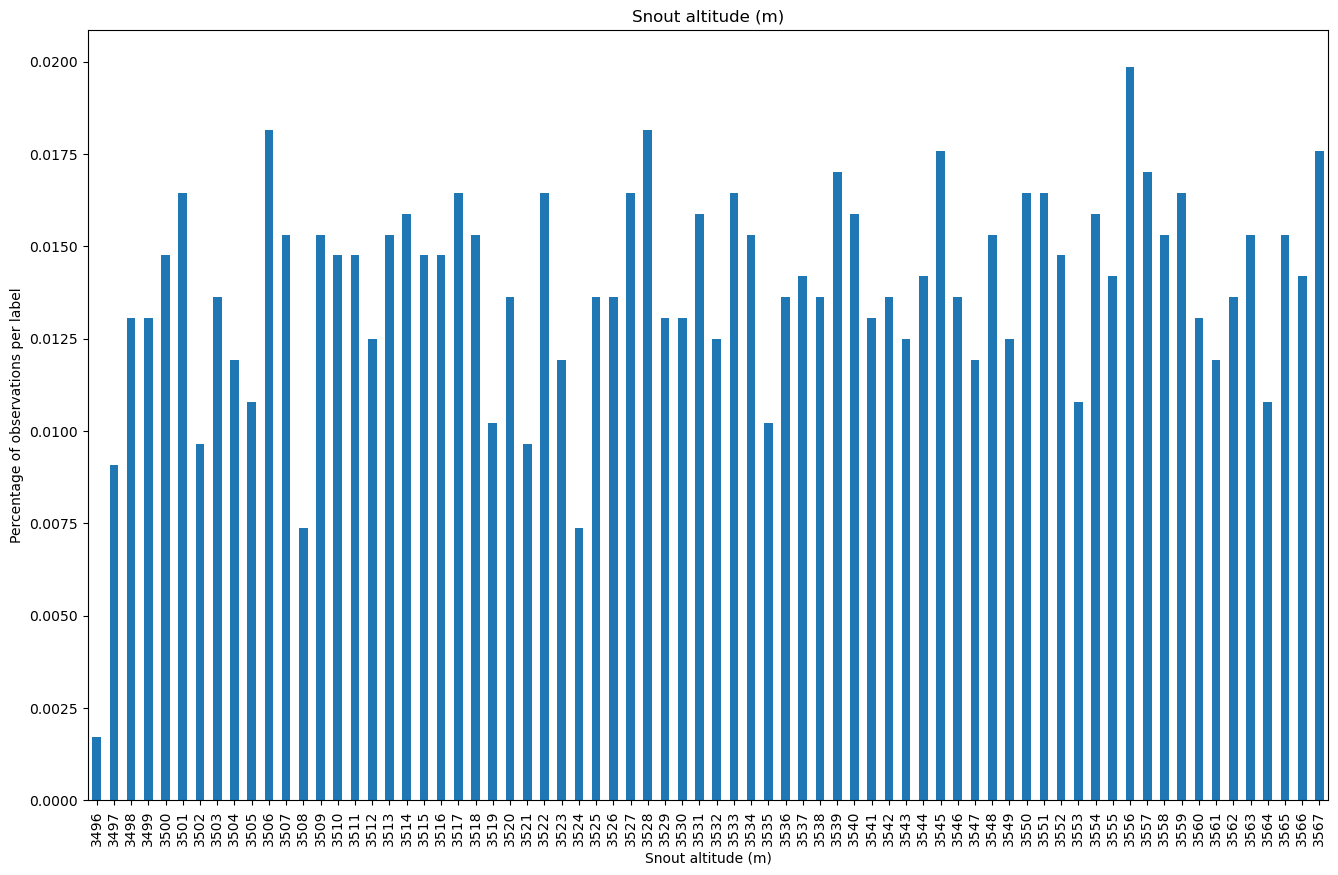

In [15]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()